In [1]:
#importamos la librería pandas
import pandas as pd

#Cargamos el dataset de abalone
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

#Leemos el dataset y le asignamos los nombres de las columnas
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]

#Mostramos las primeras 5 filas del dataset
abalone.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
abalone = abalone.drop('Sex', axis=1)
print(abalone.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [3]:
print(abalone.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

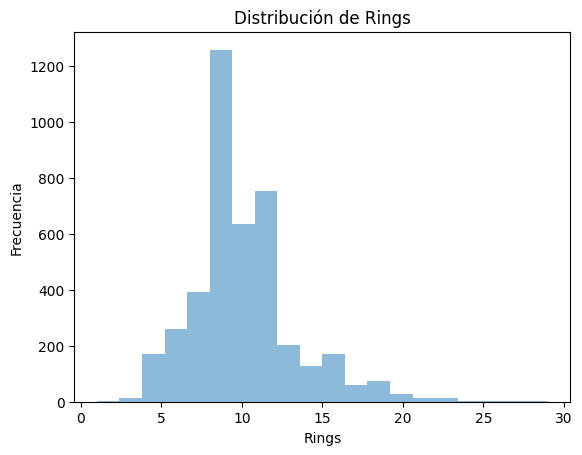

In [4]:
import matplotlib.pyplot as plt

plt.hist(abalone['Rings'], bins=20, alpha=0.5)
plt.xlabel('Rings')
plt.ylabel('Frecuencia')
plt.title('Distribución de Rings')
plt.show()

                  Length  Diameter    Height  Whole weight  Shucked weight  \
Length          1.000000  0.986812  0.827554      0.925261        0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
Height          0.827554  0.833684  1.000000      0.819221        0.774972   
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405   
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000   
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961   
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617   
Rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                Viscera weight  Shell weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole weight          0.966375      0.955355  0.540390  
Shucked weig

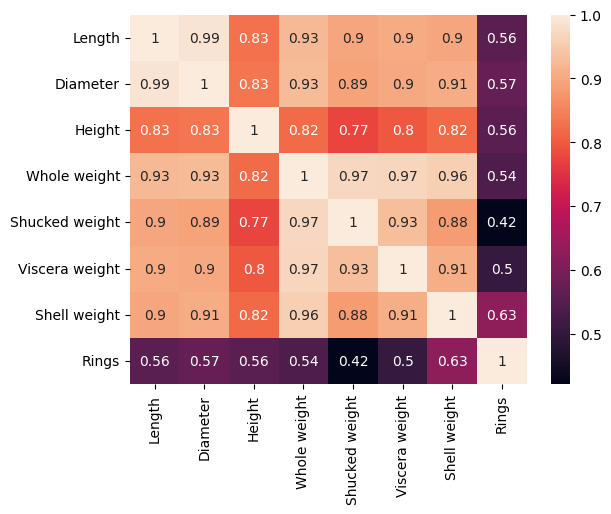

In [5]:
# Mostramos la matriz de correlación
print(abalone.corr())

#mostarmos el gráfico de la matriz de correlación
import seaborn as sns
sns.heatmap(abalone.corr(), annot=True)
plt.show()


In [8]:
from scipy.spatial.distance import pdist, squareform

# Seleccionar las columnas de las variables independientes y convertirlas a una matriz de numpy
X = abalone.drop('Rings', axis=1).values

# Calcular las distancias entre los vectores de las variables independientes
distances = pdist(X)

# Convertir el vector de distancias a una matriz cuadrada
dist_matrix = squareform(distances)

# Mostrar la matriz de distancias
print(dist_matrix) 

[[0.         0.35925409 0.20756505 ... 0.79612578 0.72399137 1.6981406 ]
 [0.35925409 0.         0.56142698 ... 1.14826663 1.07944917 2.04875059]
 [0.20756505 0.56142698 0.         ... 0.60424085 0.53367382 1.51066484]
 ...
 [0.79612578 1.14826663 0.60424085 ... 0.         0.10615437 0.91358976]
 [0.72399137 1.07944917 0.53367382 ... 0.10615437 0.         0.98398044]
 [1.6981406  2.04875059 1.51066484 ... 0.91358976 0.98398044 0.        ]]


In [9]:
import numpy as np

# Definir new_data_point
# Debe ser un vector con la misma longitud que los vectores en X
new_data_point = np.array([0.5, 0.4, 0.3, 0.2, 0.1, 0.2, 0.3])

# Calcular las distancias entre new_data_point y todos los vectores en X
distances = np.linalg.norm(X - new_data_point, axis=1)

print(distances)

[0.43780389 0.40165626 0.54043362 ... 1.07981318 1.01733881 1.98001256]


In [10]:
# Obtener los índices que ordenarían el array de distancias
indices = np.argsort(distances)

# Seleccionar los índices de las tres distancias más pequeñas
three_closest_indices = indices[:3]

print("Los tres vecinos más cercanos son los vectores en los índices:", three_closest_indices)

Los tres vecinos más cercanos son los vectores en los índices: [2641 1252  801]
